In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import yellowbrick

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [2]:
pip install scikit-learn==0.23

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = pd.read_csv("drive/MyDrive/datasetcovid19.csv")

In [4]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,DKI Jakarta,Indonesia,Asia
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,DKI Jakarta,Indonesia,Asia
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,Indonesia,Asia
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,Riau,Indonesia,Asia
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,DKI Jakarta,Indonesia,Asia


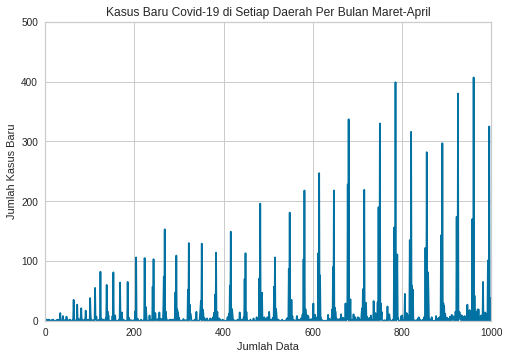

In [5]:
plt.plot(data['New Cases'])
plt.xlabel('Jumlah Data')
plt.ylabel('Jumlah Kasus Baru')
plt.title('Kasus Baru Covid-19 di Setiap Daerah Per Bulan Maret-April')
limits = [0,1000,0,500]
plt.axis(limits)
plt.show()

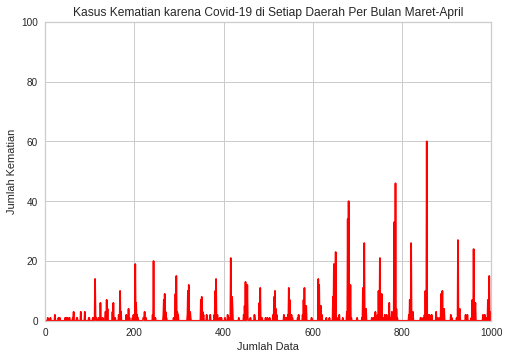

In [7]:
plt.plot(data['New Deaths'], color = 'red')
plt.xlabel('Jumlah Data')
plt.ylabel('Jumlah Kematian')
plt.title('Kasus Kematian karena Covid-19 di Setiap Daerah Per Bulan Maret-April')
limits = [0,1000,0,100]
plt.axis(limits)
plt.show()

In [8]:
labels = data.columns.tolist()
labels

['Date',
 'Location ISO Code',
 'Location',
 'New Cases',
 'New Deaths',
 'New Recovered',
 'New Active Cases',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Total Active Cases',
 'Location Level',
 'Province',
 'Country',
 'Continent']

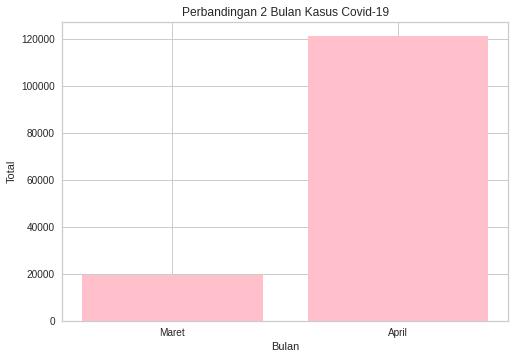

In [9]:
Bulan = ['Maret','April']
Total = [19373,121181]
plt.bar(Bulan, Total , color = 'pink')
plt.title('Perbandingan 2 Bulan Kasus Covid-19')
plt.xlabel('Bulan')
plt.ylabel('Total')
plt.show()

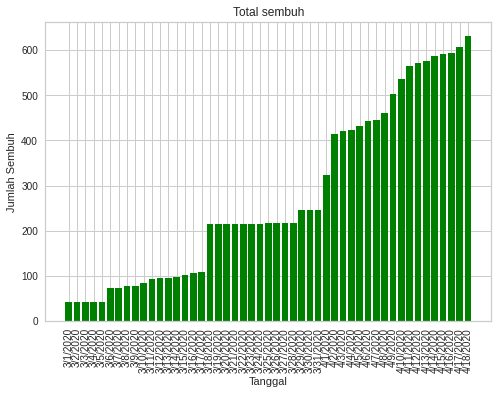

In [10]:
y = data['Total Recovered']
x = data['Date']
plt.bar(x, y, color = 'green')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sembuh')
plt.title('Total sembuh')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [11]:
jumlah = data['New Cases']
jumlahdata = pd.DataFrame(jumlah)
jumlahdata
data[jumlahdata == jumlahdata].sum()

Date                      0
Location ISO Code         0
Location                  0
New Cases             11931
New Deaths              0.0
New Recovered           0.0
New Active Cases        0.0
Total Cases             0.0
Total Deaths            0.0
Total Recovered         0.0
Total Active Cases      0.0
Location Level            0
Province                  0
Country                   0
Continent                 0
dtype: object

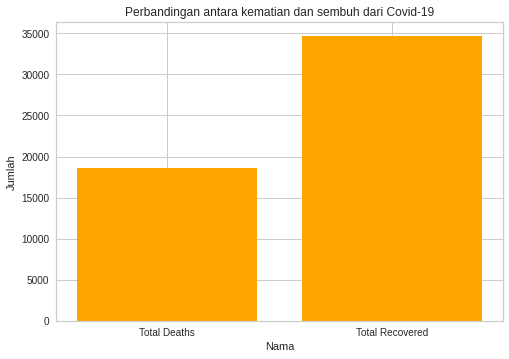

In [12]:
Bulan = ['Total Deaths','Total Recovered']
Total = data['Total Deaths'].sum(), data['Total Recovered'].sum()
plt.bar(Bulan, Total , color = 'orange')
plt.title('Perbandingan antara kematian dan sembuh dari Covid-19')
plt.xlabel('Nama')
plt.ylabel('Jumlah')
plt.show()

In [13]:
c = data.corr()
c

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
New Cases,1.000000,0.823557,0.627823,0.981153,0.951013,0.919402,0.530076,0.936098
New Deaths,0.823557,1.000000,0.655855,0.740046,0.780038,0.796789,0.507218,0.748660
New Recovered,0.627823,0.655855,1.000000,0.474672,0.639437,0.653272,0.604372,0.577190
New Active Cases,0.981153,0.740046,0.474672,1.000000,0.924789,0.881611,0.455700,0.923347
Total Cases,0.951013,0.780038,0.639437,0.924789,1.000000,0.957722,0.569742,0.983007
Total Deaths,0.919402,0.796789,0.653272,0.881611,0.957722,1.000000,0.700402,0.901558
Total Recovered,0.530076,0.507218,0.604372,0.455700,0.569742,0.700402,1.000000,0.410733
Total Active Cases,0.936098,0.748660,0.577190,0.923347,0.983007,0.901558,0.410733,1.000000


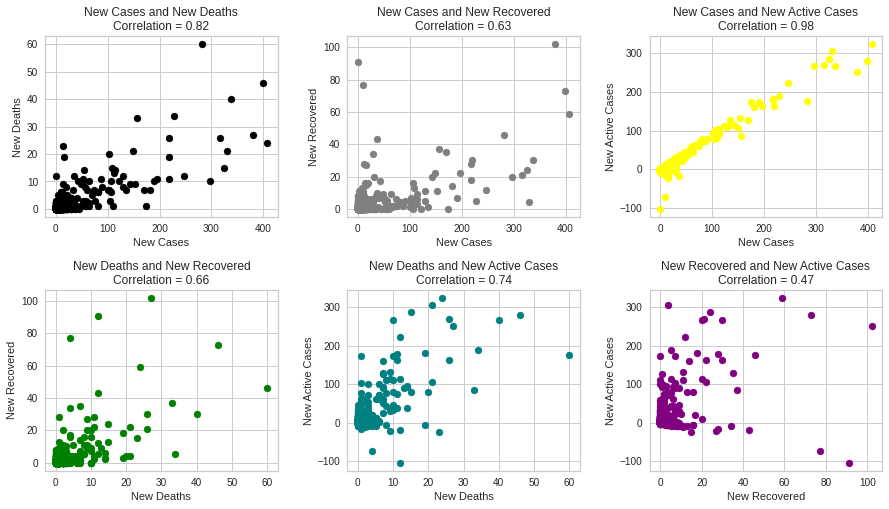

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax[0,0].scatter(data['New Cases'],data['New Deaths'],color='black')
ax[0,0].title.set_text('New Cases and New Deaths\n'+'Correlation = '+ "{:.2f}".format(c.iloc[0]['New Deaths']))
ax[0,0].set_xlabel('New Cases')
ax[0,0].set_ylabel('New Deaths')

ax[0,1].scatter(data['New Cases'],data['New Recovered'],color='grey')
ax[0,1].title.set_text('New Cases and New Recovered\n'+'Correlation = '+ "{:.2f}".format(c.iloc[0]['New Recovered']))
ax[0,1].set_xlabel('New Cases')
ax[0,1].set_ylabel('New Recovered')

ax[0,2].scatter(data['New Cases'],data['New Active Cases'],color='yellow')
ax[0,2].title.set_text('New Cases and New Active Cases\n'+'Correlation = '+ "{:.2f}".format(c.iloc[0]['New Active Cases']))
ax[0,2].set_xlabel('New Cases')
ax[0,2].set_ylabel('New Active Cases')

ax[1,0].scatter(data['New Deaths'],data['New Recovered'],color='green')
ax[1,0].title.set_text('New Deaths and New Recovered\n'+'Correlation = '+ "{:.2f}".format(c.iloc[1]['New Recovered']))
ax[1,0].set_xlabel('New Deaths')
ax[1,0].set_ylabel('New Recovered')

ax[1,1].scatter(data['New Deaths'],data['New Active Cases'],color='teal')
ax[1,1].title.set_text('New Deaths and New Active Cases\n'+'Correlation = '+ "{:.2f}".format(c.iloc[1]['New Active Cases']))
ax[1,1].set_xlabel('New Deaths')
ax[1,1].set_ylabel('New Active Cases')

ax[1,2].scatter(data['New Recovered'],data['New Active Cases'],color='purple')
ax[1,2].title.set_text('New Recovered and New Active Cases\n'+'Correlation = '+ "{:.2f}".format(c.iloc[2]['New Active Cases']))
ax[1,2].set_xlabel('New Recovered')
ax[1,2].set_ylabel('New Active Cases')

fig.subplots_adjust(wspace = 0.3,hspace = 0.4)
plt.show()

In [15]:
data_loc = data.groupby("Location Level").agg([np.mean, np.std])

In [16]:
location = data_loc['Total Cases']
location.head()

,mean,std
Location Level,,
Country,1605.791667,1848.930582
Province,66.676471,222.000006


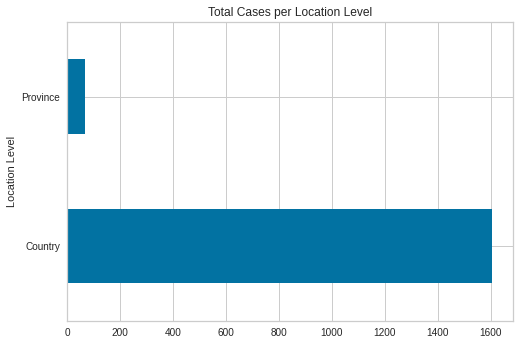

In [17]:
location.plot(kind = "barh", y = "mean", legend = False,
title = "Total Cases per Location Level")

In [18]:
data_prov = data.groupby("Province")

In [19]:
province = data_prov['New Cases'].sum()
province.head()

Province
Aceh              6
Bali            126
Banten          249
Bengkulu          4
DKI Jakarta    2493
Name: New Cases, dtype: int64

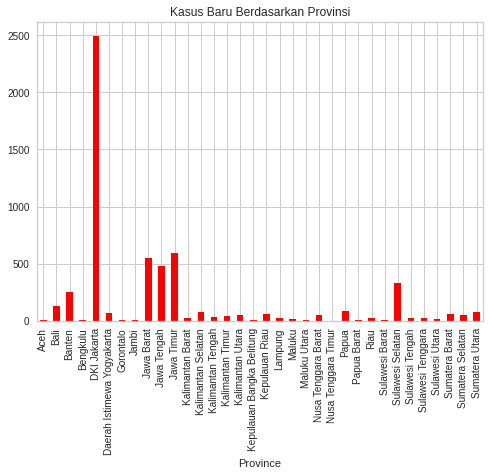

In [20]:
province.plot(kind = "bar",x = ['Province'], y = ['New Cases'], legend = False, color = 'red',
title = "Kasus Baru Berdasarkan Provinsi")

In [21]:
fitur = data.drop(['Date', 'Location ISO Code','Location', 'Total Cases','Total Deaths', 'Total Recovered','Total Active Cases','Location Level','Province','Country','Continent'], axis=1)

In [22]:
fitur.head()

,New Cases,New Deaths,New Recovered,New Active Cases
0,2,0,0,2
1,2,0,0,2
2,2,0,0,2
3,1,0,0,1
4,2,0,0,2


In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
#menghitung nilai sillhoutte
sample_silhoutte_values = silhouette_samples(fitur, cluster_label)
sample_silhoutte_values

array([ 0.96992673,  0.96992673,  0.96992673,  0.97205446,  0.96992673,
        0.97297375,  0.97138694,  0.97297375,  0.96992673,  0.97297375,
        0.97205446,  0.97297375,  0.96969298,  0.97297375,  0.97205446,
        0.97297375,  0.97150667,  0.97297375,  0.96992673,  0.97205446,
        0.97297375,  0.97297375,  0.96563148,  0.97297375,  0.97297375,
        0.97297375,  0.9644498 ,  0.97297375,  0.96992673,  0.97297375,
        0.97138694,  0.97297375,  0.97297375,  0.96969298,  0.92246471,
        0.97297375,  0.97297375,  0.97297375,  0.93841982,  0.97297375,
        0.95144024,  0.97297375,  0.97297375,  0.97297375,  0.97205446,
        0.97138694,  0.93841982,  0.97297375,  0.95408411,  0.96969298,
        0.97000283,  0.97297375,  0.97297375,  0.97297375,  0.963097  ,
        0.95979657,  0.97297375,  0.97205446,  0.97297375,  0.97297375,
        0.97297375,  0.97297375,  0.97138694,  0.9639708 ,  0.78584914,
        0.96540102,  0.97297375,  0.97297375,  0.97297375,  0.97

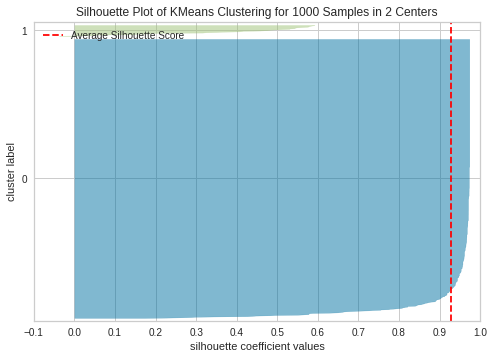

Silhouette average score is  0.9268193186945223


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


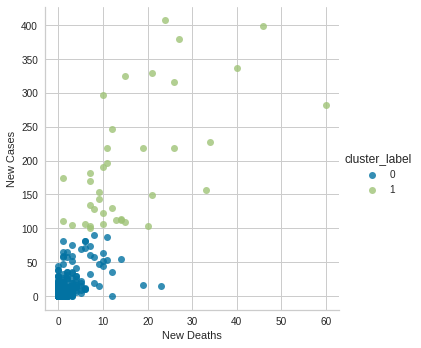

In [30]:
clusters_kmeans = KMeans(n_clusters=2, random_state=0).fit(fitur)
cluster_label = clusters_kmeans.labels_
sample_silhouette_values = silhouette_samples(fitur,cluster_label)
visualizer = SilhouetteVisualizer(clusters_kmeans, colors='yellowbrick')
visualizer.fit(fitur)
visualizer.show()
silhouette_avg = silhouette_score(fitur, cluster_label)
print('Silhouette average score is ', silhouette_avg)
new_data = fitur.copy()
clstr = pd.DataFrame(cluster_label,
columns=['cluster_label'])
new_data['cluster_label'] = clstr
facet = sns.lmplot(data=new_data, x='New Deaths', y='New Cases', hue='cluster_label',
fit_reg=False, legend=True, legend_out=True)

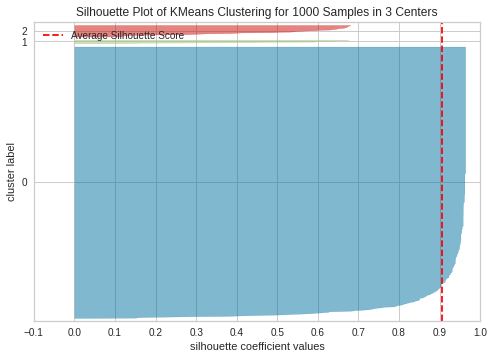

Silhouette average score is  0.9060811090212904


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


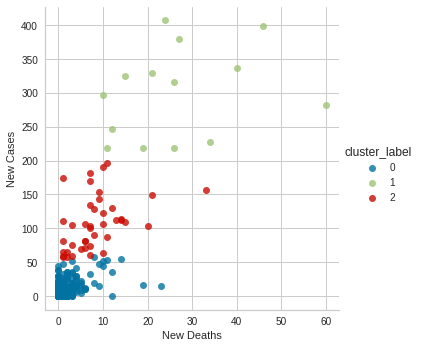

In [31]:
clusters_kmeans = KMeans(n_clusters=3, random_state=0).fit(fitur)
cluster_label = clusters_kmeans.labels_
sample_silhouette_values = silhouette_samples(fitur,cluster_label)
visualizer = SilhouetteVisualizer(clusters_kmeans, colors='yellowbrick')
visualizer.fit(fitur)
visualizer.show()
silhouette_avg = silhouette_score(fitur, cluster_label)
print('Silhouette average score is ', silhouette_avg)
new_data = fitur.copy()
clstr = pd.DataFrame(cluster_label,
columns=['cluster_label'])
new_data['cluster_label'] = clstr
facet = sns.lmplot(data=new_data, x='New Deaths', y='New Cases', hue='cluster_label',
fit_reg=False, legend=True, legend_out=True)

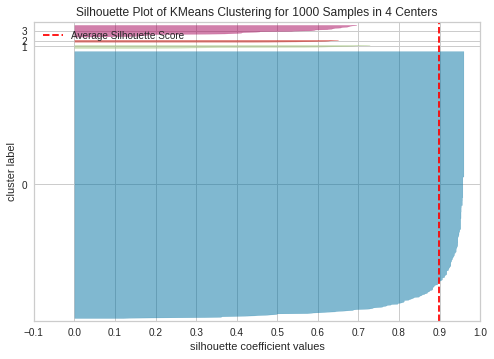

Silhouette average score is  0.8975056849064412


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


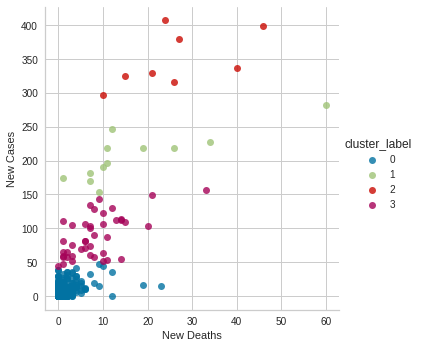

In [32]:
clusters_kmeans = KMeans(n_clusters=4, random_state=0).fit(fitur)
cluster_label = clusters_kmeans.labels_
sample_silhouette_values = silhouette_samples(fitur,cluster_label)
visualizer = SilhouetteVisualizer(clusters_kmeans, colors='yellowbrick')
visualizer.fit(fitur)
visualizer.show()
silhouette_avg = silhouette_score(fitur, cluster_label)
print('Silhouette average score is ', silhouette_avg)
new_data = fitur.copy()
clstr = pd.DataFrame(cluster_label,
columns=['cluster_label'])
new_data['cluster_label'] = clstr
facet = sns.lmplot(data=new_data, x='New Deaths', y='New Cases', hue='cluster_label',
fit_reg=False, legend=True, legend_out=True)